In [ ]:
# SOMETHING IS VERY WRONG WITH THIS CODE
# in d2l example they're using a linear regression to fit this dataset
# but trying to implement that only leads to growing test-loss, and 0 train-loss
# i will maybe come back to this 

import torch
from torch.utils.data import DataLoader, Dataset, random_split
import torch.nn as nn
import matplotlib.pyplot as plt 

batch_size = 16
tau = 4
learning_rate = 0.01
max_epochs = 10 

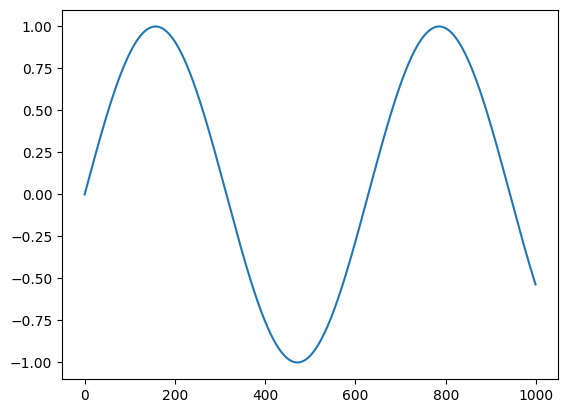

In [221]:
class SinSequenceDataset(Dataset):
    def __init__(self, T=1000, tau=10):
        self.tau = tau
        self.time = torch.arange(0, T, dtype=torch.float32)
        self.X = torch.sin(self.time * 0.01) + torch.randn(T) * 0.0

    def __len__(self):
        return len(self.X) - self.tau

    def __getitem__(self, idx):
        x_seq = self.X[idx:idx + self.tau]
        y_target = self.X[idx + self.tau]
        return x_seq, y_target.unsqueeze(-1) 


full_dataset = SinSequenceDataset(tau=tau)
train_size = int(0.8 * len(full_dataset))
train_dataset = torch.utils.data.Subset(full_dataset, range(train_size))
test_dataset = torch.utils.data.Subset(full_dataset, range(train_size, len(full_dataset)))

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

plt.plot(full_dataset.time, full_dataset.X)

In [ ]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.LazyLinear(1)
        self.net.weight.data.normal_(0, 0.01)
        self.net.bias.data.fill_(0)

    def forward(self, X):
        return self.net(X)

In [223]:
# train & test loop
def train(model, loss_fn, optimizer, dataloader):
    model.train()
    total_loss = 0

    for i, (X, y) in enumerate(dataloader):
        optimizer.zero_grad()
        pred = model(X)
        loss = loss_fn(pred.squeeze(-1), y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        break

    train_losses.append(total_loss / len(dataloader))


def test(model, loss_fn, dataloader):
    model.eval()
    with torch.no_grad():
        full_loss = 0

        for i, (X, y) in enumerate(dataloader):
            pred = model(X)
            loss = loss_fn(pred.squeeze(-1), y)
            full_loss += loss.item()

        test_losses.append(full_loss / len(dataloader))
 

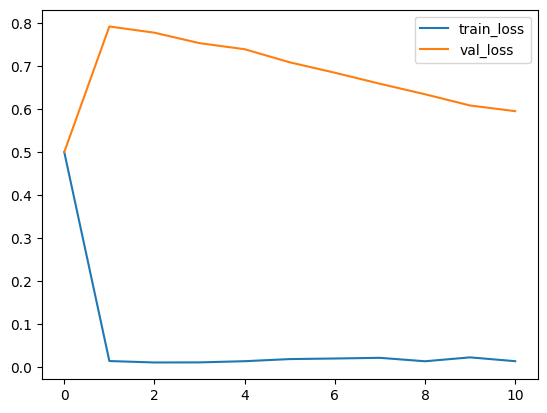

In [237]:
train_losses = [0.5]
test_losses = [0.5]

loss_fn = nn.MSELoss()
model = LinearRegression()
optimizer = torch.optim.SGD(model.parameters(), learning_rate)

for i in range(max_epochs):
    train(model, loss_fn, optimizer, train_loader)
    test(model, loss_fn, test_loader)

plt.plot(train_losses, label='train_loss')
plt.plot(test_losses, label='val_loss')
plt.legend()
plt.show()